<a href="https://colab.research.google.com/github/guirzr1/acoes-simuladas-vs-mercado/blob/main/Analisando_Acoes_com_Python_Simulando_Carteira_e_comparando_com_o_IBOV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader.data as web
import datetime as dt

import warnings
warnings.filterwarnings('ignore')


# Obtendo e tratando os dados
  

In [87]:
tickers = ["BPAC11.SA", "PETR4.SA", "WEGE3.SA", "GGBR4.SA", "VALE3.SA"]

carteira = yf.download(tickers, start='2020-01-01')['Adj Close']
bova11 = yf.download('BOVA11.SA', start='2020-01-01')['Adj Close']


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [88]:
carteira

Ticker,BPAC11.SA,GGBR4.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2020-01-02,16.913265,11.424861,9.847284,34.819252,16.412872
2020-01-03,16.962351,11.237749,9.767096,34.562901,16.203285
2020-01-06,16.937813,11.210232,9.882568,34.357815,16.245201
2020-01-07,17.005386,11.386338,9.844077,34.607761,16.370956
2020-01-08,16.854675,11.430366,9.783134,34.614166,15.751516
...,...,...,...,...,...
2024-12-27,27.580000,18.340000,35.660000,54.740002,53.680000
2024-12-30,27.200001,18.139999,36.189999,54.549999,52.770000
2025-01-02,27.100000,17.910000,36.770000,54.250000,52.720001


# Resultados


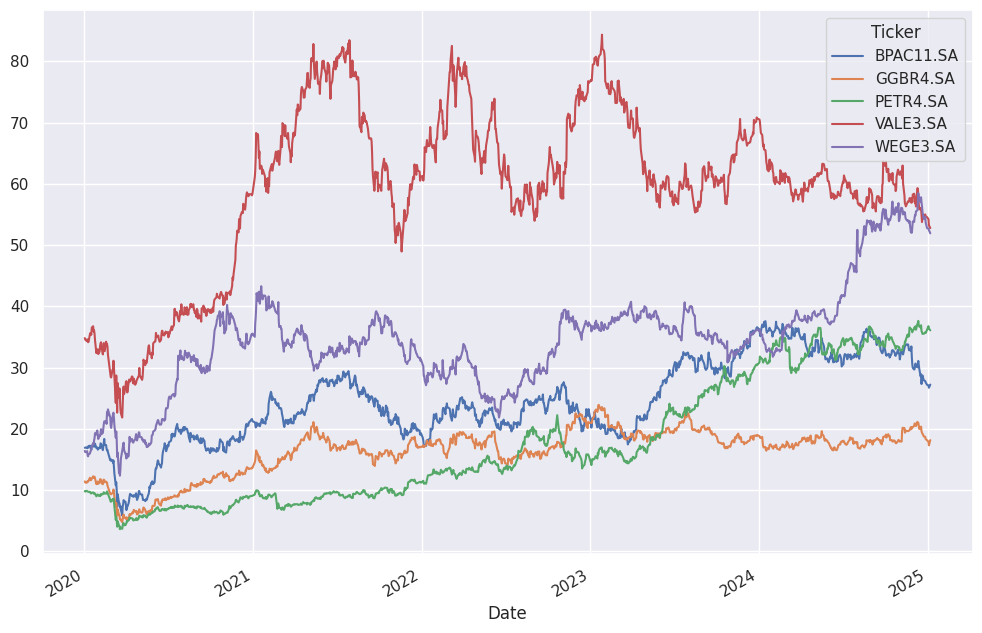

In [89]:
sns.set()
carteira.plot(figsize=(12, 8))
plt.show()

In [90]:
carteira_normalizada = (carteira / carteira.iloc[0]) * 10000
carteira_normalizada

Ticker,BPAC11.SA,GGBR4.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2020-01-02,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2020-01-03,10029.021964,9836.223955,9918.567649,9926.376514,9872.303218
2020-01-06,10014.513801,9812.138481,10035.831242,9867.476411,9897.841645
2020-01-07,10054.466789,9966.281672,9996.743055,9939.260432,9974.461573
2020-01-08,9965.358590,10004.818096,9934.855281,9941.099897,9597.050437
...,...,...,...,...,...
2024-12-27,16306.727028,16052.711911,36213.029602,15721.188283,32706.036626
2024-12-30,16082.051807,15877.654408,36751.247818,15666.620068,32151.593851
2025-01-02,16022.926393,15676.339449,37340.244553,15580.461056,32121.130422


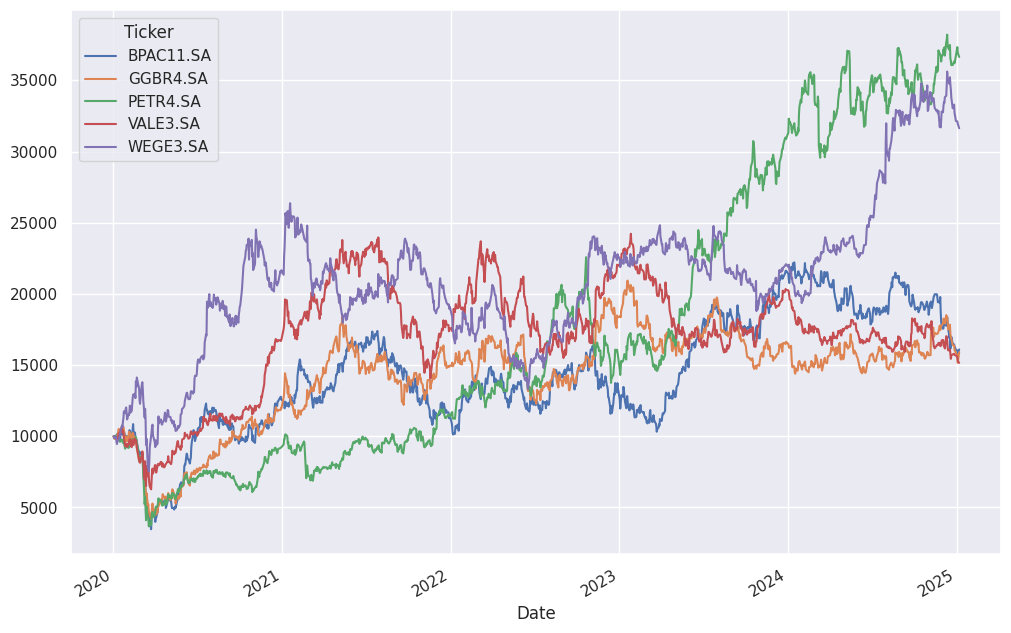

In [91]:
carteira_normalizada.plot(figsize=(12, 8))
plt.show()

In [92]:
carteira_normalizada["saldo"] =  carteira_normalizada.sum(axis=1)
carteira_normalizada

Ticker,BPAC11.SA,GGBR4.SA,PETR4.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2020-01-02,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000
2020-01-03,10029.021964,9836.223955,9918.567649,9926.376514,9872.303218,49582.493300
2020-01-06,10014.513801,9812.138481,10035.831242,9867.476411,9897.841645,49627.801580
2020-01-07,10054.466789,9966.281672,9996.743055,9939.260432,9974.461573,49931.213522
2020-01-08,9965.358590,10004.818096,9934.855281,9941.099897,9597.050437,49443.182302
...,...,...,...,...,...,...
2024-12-27,16306.727028,16052.711911,36213.029602,15721.188283,32706.036626,116999.693451
2024-12-30,16082.051807,15877.654408,36751.247818,15666.620068,32151.593851,116529.167952
2025-01-02,16022.926393,15676.339449,37340.244553,15580.461056,32121.130422,116741.101872


In [93]:
bova11_retorno = (bova11 / bova11.iloc[0]) * 50000
bova11_retorno

Ticker,BOVA11.SA
Date,
2020-01-02,50000.000000
2020-01-03,49807.425236
2020-01-06,49277.835453
2020-01-07,49124.649844
2020-01-08,48997.723670
...,...
2024-12-27,51321.780606
2024-12-30,51326.154953
2025-01-02,51251.750991


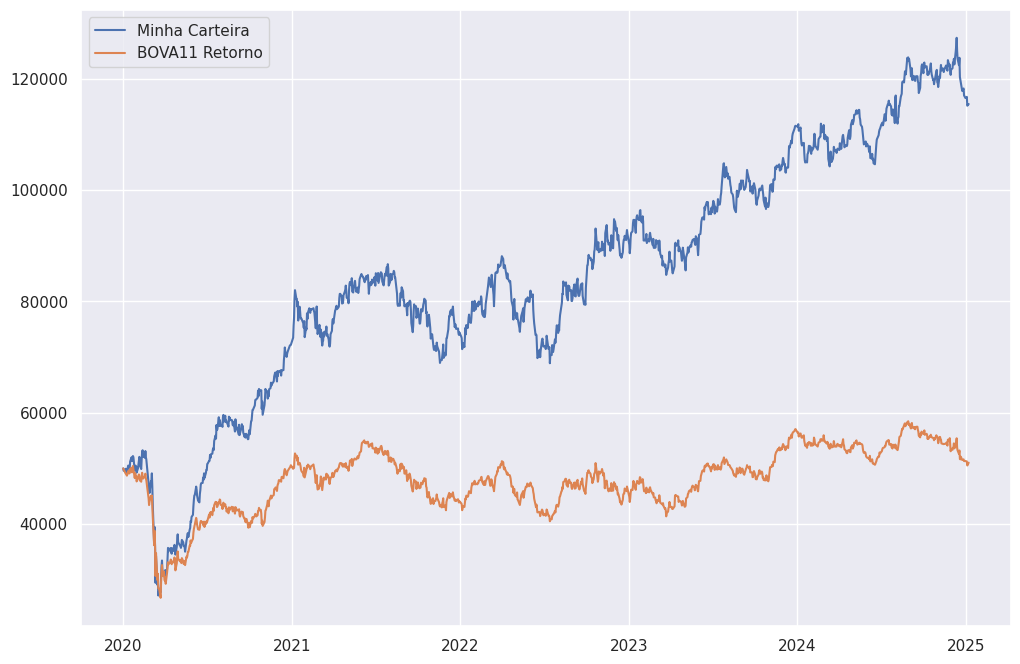

In [94]:
#Plotando os 2 retornos,
plt.figure(figsize=(12, 8))
plt.plot(carteira_normalizada["saldo"], label='Minha Carteira')
plt.plot(bova11_retorno, label='BOVA11 Retorno')
plt.legend()
plt.show()